First import the libraries needed and check which fiels are available as datasources.

In [98]:
%matplotlib inline
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

genderclassmodel.csv
gendermodel.csv
gendermodel.py
myfirstforest.py
test.csv
train.csv



In [99]:


import matplotlib.pyplot as plt
import seaborn as sns

Import trainig data from train.csv and visualize few rows to se what is contained in the file.

In [100]:
tr_df = pd.read_csv("../input/train.csv")
tr_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Here I see that "Cabin" field has NaN values. I have to decide later what to do with them.

Check datatypes

In [101]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


And show some statistics for numerical fields

In [102]:
tr_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the table is visible that "Age" has missing values too, as they are 714 of total 891  records. "Cabin" has only 204 records and "Embarked" has 889. The "Survived" field is the label. It has 0 and 1.

And now let's import the test data and check some statistics, too.

In [103]:
test_df = pd.read_csv("../input/test.csv")
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [104]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [105]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


For test data there are missing values in fields "Age", "Fare", "Cabin". In "Fare" only one value is missing.

Now I display some histograms for data fields in training data

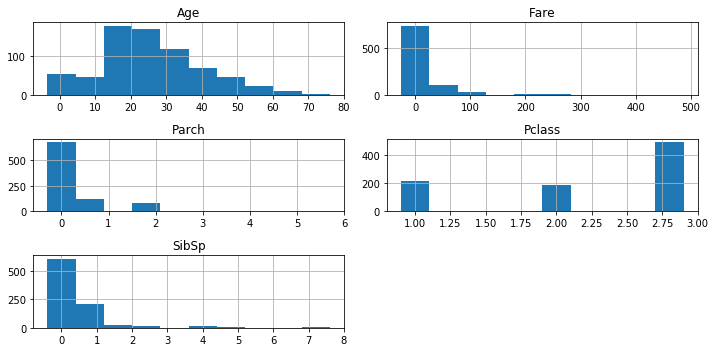

In [106]:
tr_df[["Age", "Pclass", "Fare", "Parch", "SibSp"]].hist(align='left', figsize = (10,5))
plt.tight_layout()
plt.show()

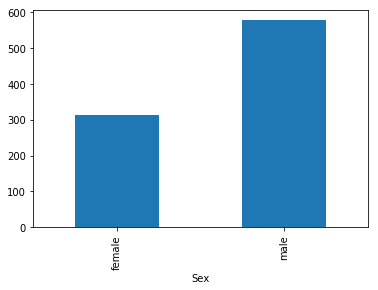

In [107]:
tr_df.groupby("Sex")["Sex"].count().plot(kind='bar')
plt.show()

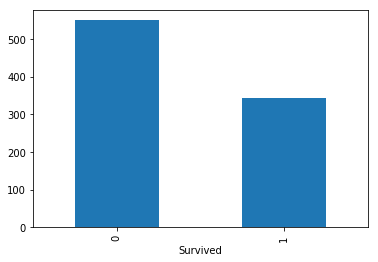

In [108]:
tr_df.groupby("Survived")["Survived"].count().plot(kind='bar')
plt.show()

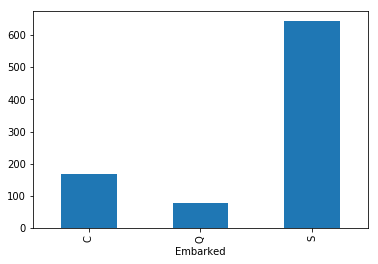

In [109]:
tr_df.groupby("Embarked")["Embarked"].count().plot(kind='bar')
plt.show()

Plot the correlations between columns

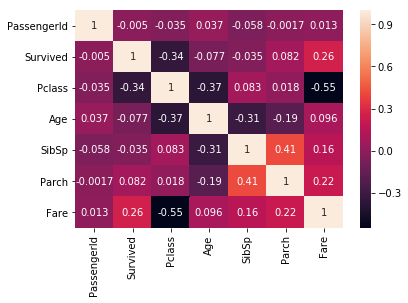

In [110]:
sns.heatmap(tr_df.corr(), annot = True)

### Some data transformation is needed

In [111]:
def df_transform(df):
    df = df.drop(["Name","Ticket","PassengerId","Cabin","Age"], axis=1)
    df = pd.get_dummies(df, columns=['Sex','Embarked']).fillna(0)
    return df

In [112]:
tr_df = df_transform(tr_df)
tr_df.head(3)

,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1


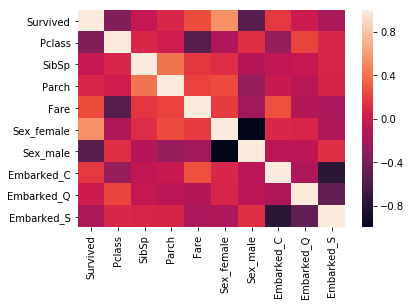

In [113]:
sns.heatmap(tr_df.corr())

## Split data for training and testing

In [114]:
from sklearn.model_selection import train_test_split

#split data to training : test (70% : 30%)
attr_train, attr_test, l_train, l_test = train_test_split(tr_df.drop("Survived", axis=1), tr_df.Survived, train_size = 0.7)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Model 1. Linear regression

In [115]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

trained = model.fit(attr_train, l_train)
lin_reg_score = trained.score(attr_test,l_test)
print("LinearRegression score: {}".format(lin_reg_score ))


LinearRegression score: 0.4398418480058707


In [116]:
#output.to_csv("../output/my_gender_submission.csv")

### Cross validation

In [117]:
# Time for cross validation with initially selected 70% data for training

from sklearn.model_selection import cross_val_score, StratifiedKFold

attributes = attr_train
labels = l_train

kfold = StratifiedKFold(n_splits = 5)

lin_reg_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(lin_reg_scores)

[ 0.31460387  0.42925202  0.33993455  0.35298323  0.16814677]


##Model 2. Logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

trained = model.fit(attr_train, l_train)
logis_reg_score = trained.score(attr_test,l_test)
print("LogisticRegression score: {}".format(logis_reg_score))

LogisticRegression score: 0.8097014925373134


In [119]:
# Loogistic regressioin cross validation

attributes = attr_train
labels = l_train

kfold = StratifiedKFold(n_splits = 5)

logis_reg_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(logis_reg_scores)

[ 0.75396825  0.8         0.78225806  0.81451613  0.77419355]


### Parameter tuning

In [120]:
from sklearn.model_selection import GridSearchCV

tuned_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],  "penalty": ["l1", "l2"]}]
grid = GridSearchCV(LogisticRegression(C = 1), tuned_params)
grid.fit(attr_train, l_train)
print(grid.best_params_) # Estimator: grid.best_estimator_

{'C': 0.1, 'penalty': 'l2'}


In [121]:
# Loogistic regressioin cross validation with tuned parameters

model = LogisticRegression(C = 10, penalty = "l1")

kfold = StratifiedKFold(n_splits = 5)

scores = cross_val_score(model, attributes, labels, cv = kfold)
print(scores)

[ 0.73809524  0.8         0.78225806  0.7983871   0.76612903]


There is no change after hyperparameter tuning

### Model 3. SVC

In [122]:
from sklearn.svm import SVC

model = SVC()

trained = model.fit(attr_train, l_train)
svm_score = trained.score(attr_test,l_test)
print("SVC score: {}".format(svm_score))

SVC score: 0.7611940298507462


In [123]:
# SVC cross validation

attributes = attr_train
labels = l_train

kfold = StratifiedKFold(n_splits = 5)

svm_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(svm_scores)

[ 0.71428571  0.744       0.78225806  0.77419355  0.7016129 ]


###Model 4. Random Forest

In [124]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

trained = model.fit(attr_train, l_train)
rand_forest_score = trained.score(attr_test,l_test)
print("RandomForestClassifier score: {}".format(rand_forest_score))

RandomForestClassifier score: 0.7985074626865671


In [125]:
# RandomForestClassifier cross validation

kfold = StratifiedKFold(n_splits = 5)

rand_forest_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(rand_forest_scores)

[ 0.78571429  0.768       0.78225806  0.78225806  0.78225806]


###Model 5. K Neighbors

In [126]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

trained = model.fit(attr_train, l_train)
k_neigh_score = trained.score(attr_test,l_test)
print("KNeighborsClassifier score: {}".format(k_neigh_score))

# KNeighborsClassifier cross validation

kfold = StratifiedKFold(n_splits = 5)

k_neigh_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(k_neigh_scores)

KNeighborsClassifier score: 0.7798507462686567
[ 0.71428571  0.76        0.75        0.74193548  0.71774194]


### Model 6. Decision Tree

In [127]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

trained = model.fit(attr_train, l_train)
decision_tree_score = trained.score(attr_test,l_test)
print("DecisionTreeClassifier score: {}".format(decision_tree_score))

# KNeighborsClassifier cross validation

kfold = StratifiedKFold(n_splits = 5)

decision_tree_scores = cross_val_score(model, attributes, labels, cv = kfold)
print(decision_tree_scores)

DecisionTreeClassifier score: 0.7985074626865671
[ 0.80952381  0.808       0.78225806  0.77419355  0.76612903]


### All scores

In [128]:
print("Single Score\n\nLinear regressoin:\t {}\nLogistic regression:\t {}\nSVM:\t\t\t {}\nRandom forest:\t\t {}\nK neighbors:\t\t {}\nDecision tree:\t\t {}\n"
      .format(lin_reg_score, logis_reg_score, svm_score, rand_forest_score, k_neigh_score, decision_tree_score))

print("Cross Validation\n\nLinear regressoin:\t {}\nLogistic regression:\t {}\nSVM:\t\t\t {}\nRandom forest:\t\t {}\nK neighbors:\t\t {}\nDecision tree:\t\t {}\n"
      .format(lin_reg_scores, logis_reg_scores, svm_scores, rand_forest_scores, k_neigh_scores, decision_tree_scores))

Single Score

Linear regressoin:	 0.4398418480058707
Logistic regression:	 0.8097014925373134
SVM:			 0.7611940298507462
Random forest:		 0.7985074626865671
K neighbors:		 0.7798507462686567
Decision tree:		 0.7985074626865671

Cross Validation

Linear regressoin:	 [ 0.31460387  0.42925202  0.33993455  0.35298323  0.16814677]
Logistic regression:	 [ 0.75396825  0.8         0.78225806  0.81451613  0.77419355]
SVM:			 [ 0.71428571  0.744       0.78225806  0.77419355  0.7016129 ]
Random forest:		 [ 0.78571429  0.768       0.78225806  0.78225806  0.78225806]
K neighbors:		 [ 0.71428571  0.76        0.75        0.74193548  0.71774194]
Decision tree:		 [ 0.80952381  0.808       0.78225806  0.77419355  0.76612903]



In [129]:
# Export data

## This is for the submission

#model = LogisticRegression() # may select another model
#trained = model.fit(tr_df.drop("Survived", axis=1), tr_df.Survived)
#predicted = model.predict(df_transform(test_df))
#print(trained)
#print(predicted.round(0).astype(int))

#output = test_df[["PassengerId"]]
#output["Survived"] = predicted.round(0).astype(int)
#output = output.set_index("PassengerId")
#output